In [2]:
import numpy as np
import torch
import matplotlib.pylab as pl
import ot
import pylab
import math
import proplot as plot
plot.rc['figure.facecolor'] = "white"

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

dtype = torch.DoubleTensor
print('Used device: '+device)

Used device: cuda


In [16]:
import sys
sys.path.append('../code/')

In [17]:
from generate_data import make_data
from SWGG import SWGG_smooth

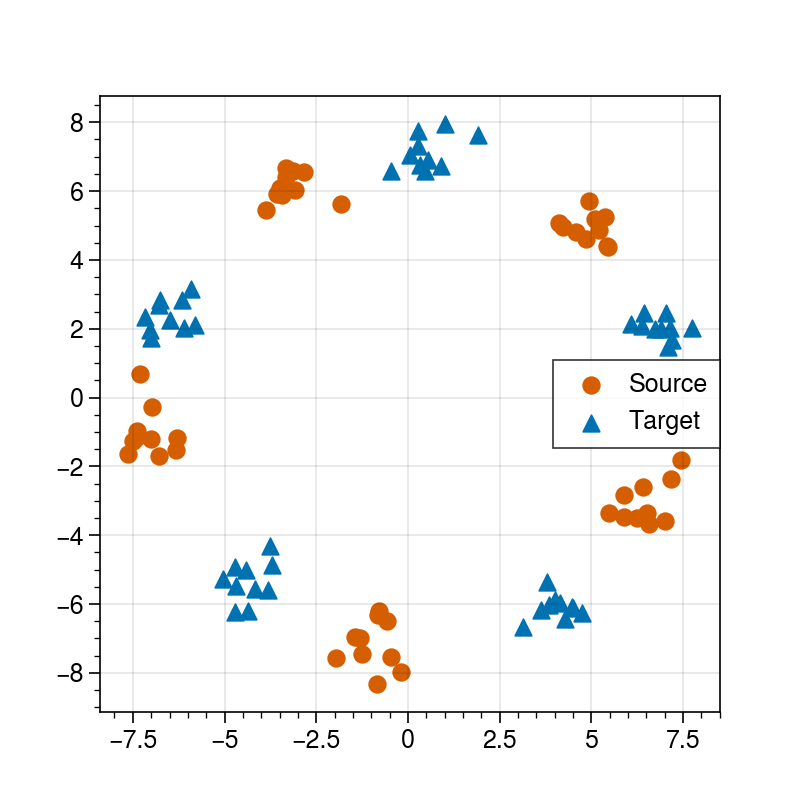

In [25]:
n=50
dim=2
X,Y=make_data('mog_reg2',n,dim)
pl.figure(figsize=(4,4))
pl.scatter(X[:, 0], X[:, 1], c='C1', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C0', label='Target',marker="^")
pl.legend(loc=5)
pl.savefig("distrib_landscape1.pdf",bbox_inches='tight')

In [26]:
p=3
X_cut=X[:,0:2]
Y_cut=Y[:,0:2]
num_proj=360*p
thetas = np.linspace(0, 2*np.pi, num_proj)
dire = np.array([(np.cos(theta),np.sin(theta)) for theta in thetas])
dir_torch=torch.from_numpy(dire).to(device)

msw_theta = [SWGG_smooth(X_cut,Y_cut,p.float(),s=1,std=0) for p in dir_torch]
msw_theta_pos = [SWGG_smooth(X_cut,Y_cut,p.float(),s=2000,std=.5) for p in dir_torch]

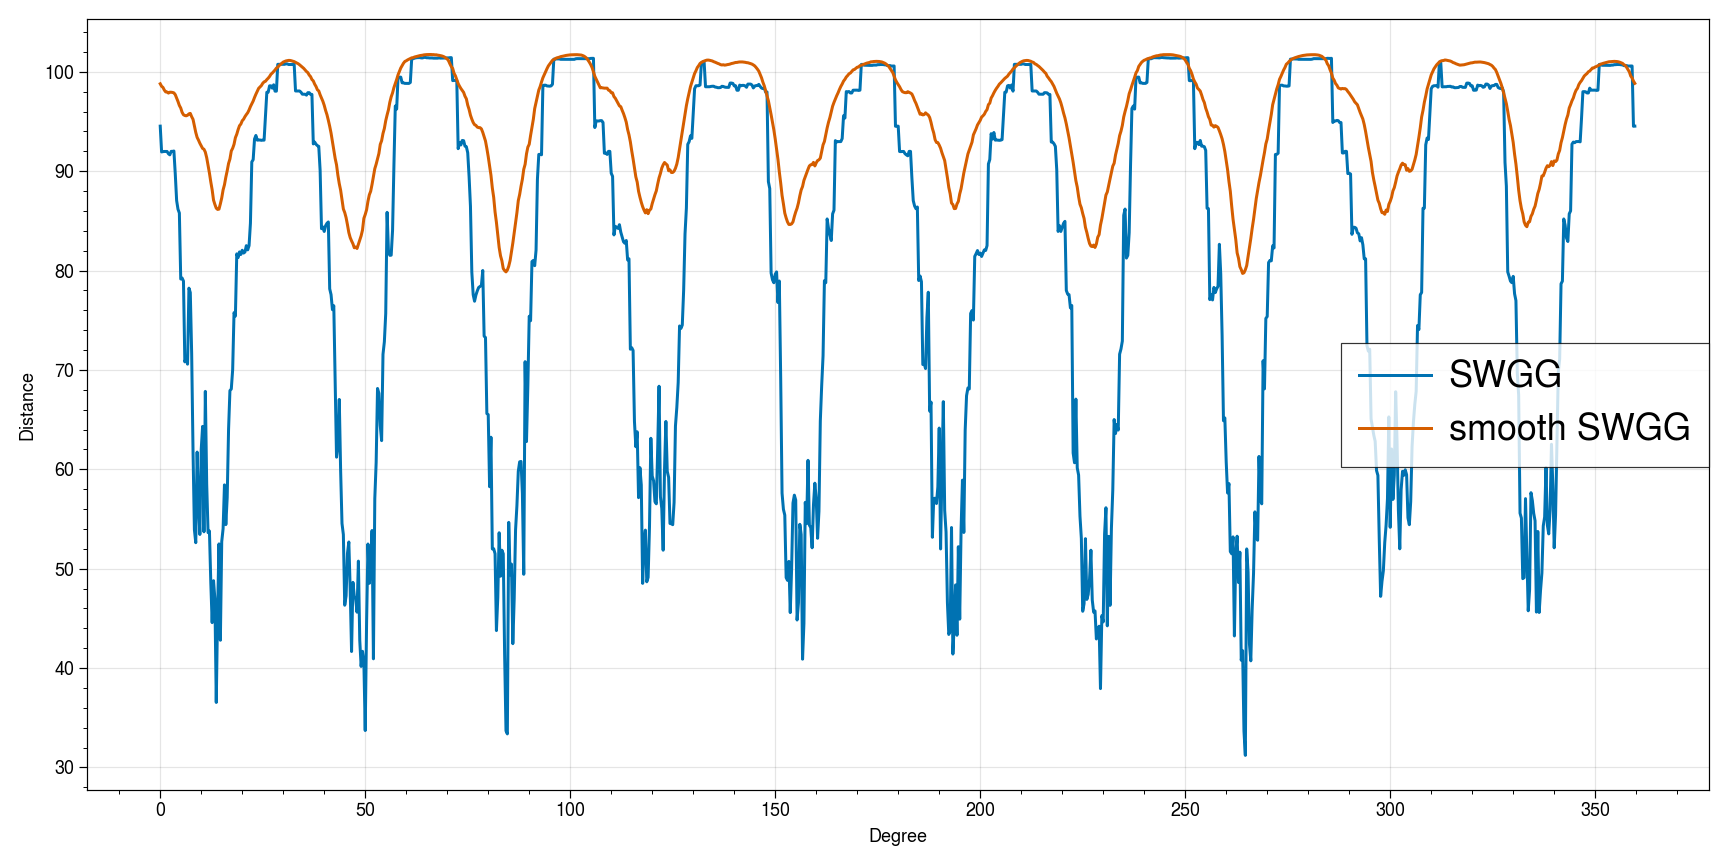

In [27]:
l=np.arange(0,360,1/p)
pl.figure(figsize=(12,6))
pl.plot(l,msw_theta, label="SWGG",c='C0')
pl.plot(l,msw_theta_pos, label="smooth SWGG",c='C1')
#pl.plot(msw_theta_mass, label="minSW mass",c='C2')
pl.xlabel('Degree')
pl.ylabel('Distance')
pl.tight_layout()
pl.legend(loc=5, prop={'size': 18})
pl.savefig("landscape1.pdf",bbox_inches='tight')

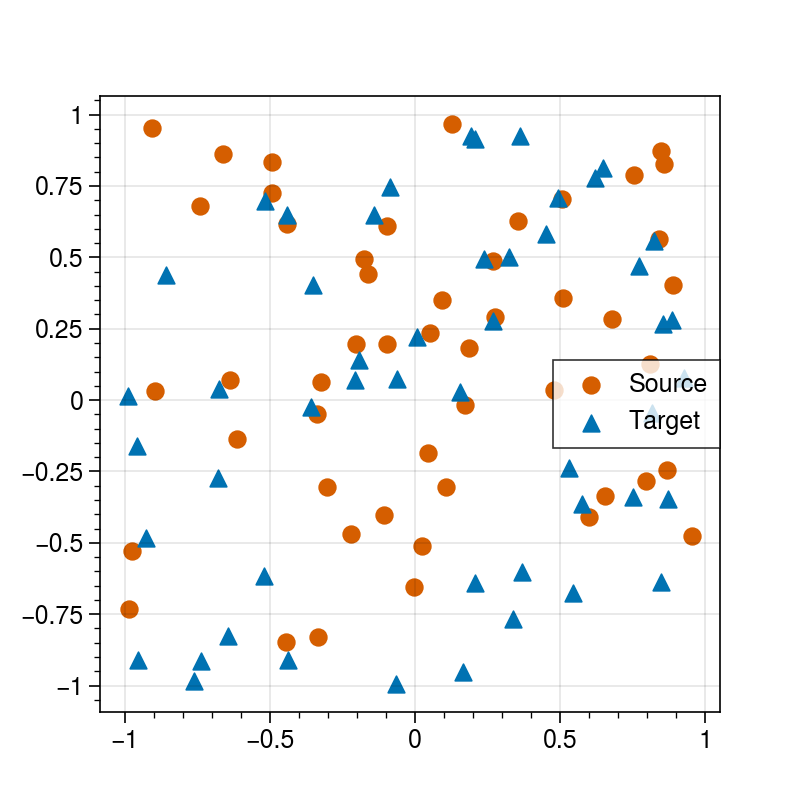

In [21]:
n=50
dim=2
X,Y=make_data('cube',n,dim)
pl.figure(figsize=(4,4))
pl.scatter(X[:, 0], X[:, 1], c='C1', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C0', label='Target',marker="^")
pl.legend(loc=5)
pl.savefig("distrib_landscape2.pdf",bbox_inches='tight')

In [22]:
p=2
X_cut=X[:,0:2]
Y_cut=Y[:,0:2]
num_proj=360*p
thetas = np.linspace(0, 2*np.pi, num_proj)
dire = np.array([(np.cos(theta),np.sin(theta)) for theta in thetas])
dir_torch=torch.from_numpy(dire).to(device)

msw_theta = [SWGG_smooth(X_cut,Y_cut,p.float(),s=1,std=0) for p in dir_torch]
msw_theta_pos = [SWGG_smooth(X_cut,Y_cut,p.float(),s=2000,std=.3) for p in dir_torch]

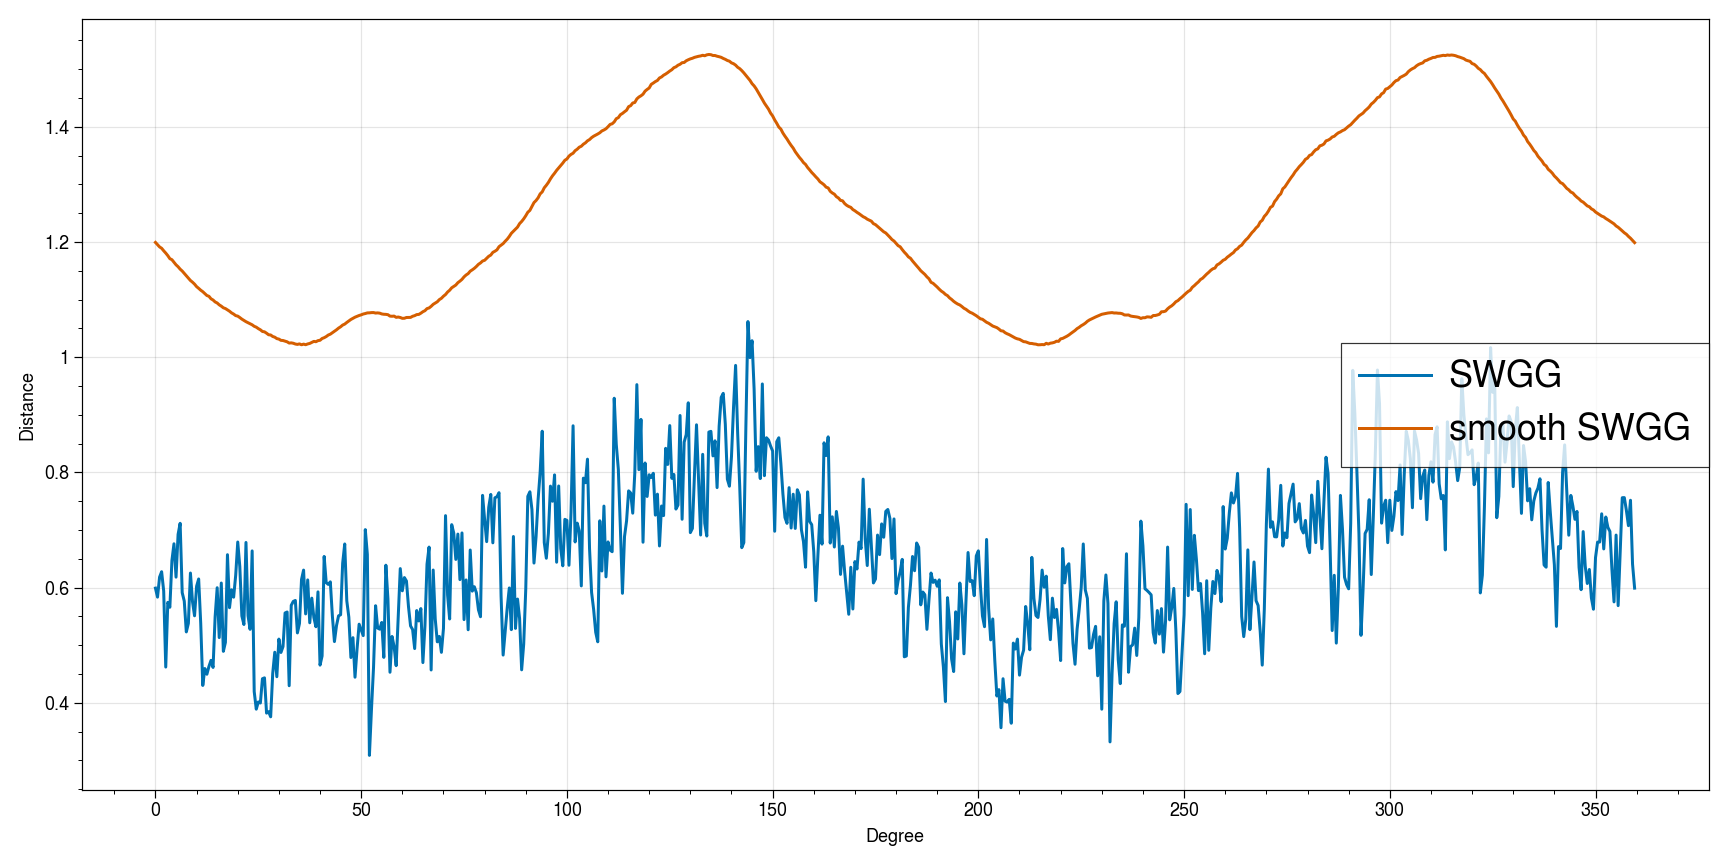

In [24]:
l=np.arange(0,360,1/p)
pl.figure(figsize=(12,6))
pl.plot(l,msw_theta, label="SWGG",c='C0')
pl.plot(l,msw_theta_pos, label="smooth SWGG",c='C1')
#pl.plot(msw_theta_mass, label="minSW mass",c='C2')
pl.xlabel('Degree')
pl.ylabel('Distance')
pl.tight_layout()
pl.legend(loc=5, prop={'size': 18})
pl.savefig("landscape2.pdf",bbox_inches='tight')